In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import cv2

In [5]:
df = pd.read_csv('C:\\Users\\rhuan\\OneDrive\\Área de Trabalho\\COLAB\\Sistemas Inteligentes\\tibia.csv')
df

,HP,XP,MaxGold,Name
0,7350,4650,999,Dark Torturer
1,8200,6000,700,Demon
2,20000,11200,1694,Juggernaut
3,9500,7216,997,Grimeleech
4,14000,11000,1282,Hellflayer
5,8500,6248,982,Vexclaw
6,5300,4700,1100,Crazed Summer Rearguard
7,5500,5000,1300,Crazed Summer Vanguard
8,4000,2500,636,Behemoth
9,3500,1760,600,Breach Brood


In [6]:
x1 = df['HP']
x1 = stats.zscore(x1)
x2 = df['XP']
x2 = stats.zscore(x2)
X = x = np.c_[x1, x2, np.ones(32)]

Separando cada uma das colunas de características e as normalizando; adicionando uma coluna de 1s como terceira coluna (procedimento necessário devido ao bias)

In [7]:
Y = df['MaxGold'].values
np.array(Y)
Y = stats.zscore(Y)
Y

array([ 0.5013589 , -0.5190627 ,  2.87324187,  0.49453333,  1.46717599,
        0.44334162,  0.8460498 ,  1.52860605, -0.7374807 , -0.86034082,
        0.16349355, -0.5190627 , -1.54289708, -1.29376404,  0.49453333,
       -0.17778457,  0.5730273 , -0.52247548, -1.54289708, -1.20161895,
       -1.20161895,  1.86988418,  0.3921499 , -0.17778457,  0.4467544 ,
        0.47064387, -0.5190627 , -0.5190627 , -1.03097989, -0.18461014,
       -0.17778457,  0.16349355])

Separando e normalizando a coluna target

(-0.5, 577.5, 220.5, -0.5)

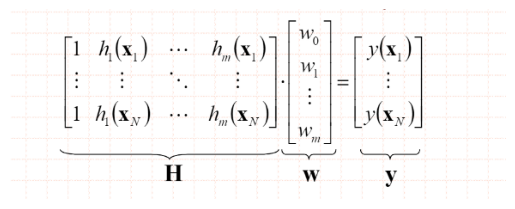

In [9]:
img = cv2.imread('Matriz.png')
plt.imshow(img)
plt.axis('off')

Necessita-se deteminar os pesos de uma rede RBF com funções radiais conhecidas. Para uma representação ideal da saída, necessita-se que a rede possua pesos w. Caso exista um bias (w0), precisa-se definir os pesos tais quais a imagem acima.

*Ref: Prof Dalcimar Casanova*

(-0.5, 383.5, 75.5, -0.5)

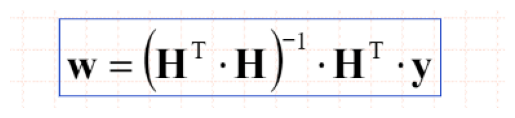

In [10]:
img1 = cv2.imread('Eq.png')
plt.imshow(img1)
plt.axis('off')

Então, a solução seria dada pela equação acima.

*Ref: Prof Dalcimar Casanova*

In [11]:
H = np.array(X)
w = np.dot(np.dot(np.linalg.inv(np.dot(H.T, H)), H.T), Y)
w

array([ 5.67090668e-01,  8.02749144e-02, -2.08166817e-17])

In [22]:
y_pred = np.dot(X, w)
print(y_pred)
mse = mean_squared_error(Y,y_pred)
print(f'O MSE obtido foi de: {mse}')
mae = mean_absolute_error(Y,y_pred)
print(f'O MAE obtido foi de: {mae}')

[ 0.24535647  0.42770455  2.4927237   0.67735771  1.52689543  0.48419344
 -0.08055907 -0.03826146 -0.36410433 -0.46950392 -0.28763701 -0.38077552
 -0.6056289  -0.64548173 -0.25443309 -0.45655397 -0.29769649  0.53441436
  0.15600499 -0.22563928 -0.32153324 -0.12850605  0.28138508 -0.86892363
  0.04027417 -0.05782485 -0.18361514 -0.34357515 -0.64159    -0.30541245
  0.14174482 -0.05079947]
O MSE obtido foi de: 0.5870421614080943
O MAE obtido foi de: 0.5968703461982812


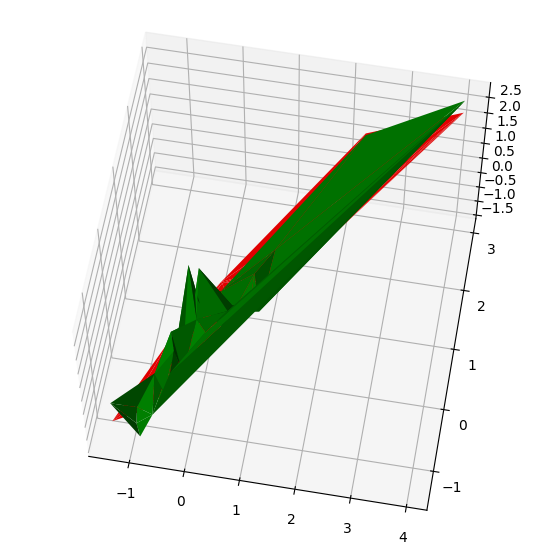

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], y_pred,color = 'red')
ax.plot_trisurf(X[:,0], X[:,1], Y, color = 'green')
ax.view_init(elev=60, azim=-80)

plt.show()

É gerada uma imagem com as superfícies, sendo que em verde temos a original, e em vermelho a estimada com a rede RBF.